In [96]:
import pandas as pd
from powersimdata import Grid
import matplotlib.pyplot as plt


In [1]:
from powersimdata.design.generation.cost_curves import get_supply_data

In [5]:
texas = Grid(["Texas"])

Reading bus.csv
Reading plant.csv
Reading gencost.csv
Reading branch.csv
Reading dcline.csv
Reading sub.csv
Reading bus2sub.csv
Reading zone.csv


In [90]:
# Convert to Matpower format, and save to .m file
# https://matpower.org/docs/ref/matpower5.0/caseformat.html

OUTPUT = 'D:/papers/texas_test.m'

bus = 'mpc.bus = [\n' + \
      texas.bus.reset_index().iloc[:, :13].to_string(header=False, index=False).replace('\n',';\n') + \
      '\n];\n'

# Drop plant ID
gen = 'mpc.gen = [\n' + \
      texas.plant.iloc[:,:11].to_string(header=False, index=False).replace('\n',';\n') + \
      '\n];\n'

gencost = 'mpc.gencost = [\n' + \
          texas.gencost['after'].iloc[:,:-1].to_string(header=False, index=False).replace('\n',';\n') + \
          '\n];\n'

# Need to include angmin, angmax
branch = 'mpc.branch = [\n' + \
         texas.branch.iloc[:,:13].to_string(header=False, index=False).replace('\n',';\n') + \
         '\n];\n'

text_file = open(OUTPUT, "w")

n = text_file.write('function mpc = case3\n' + 'mpc.baseMVA = 100.0;\n' + "mpc.version = '2';\n" + bus + gen + gencost + branch)
text_file.close()

100915 101015 101115 101215 101315 101415 101515 101615 101715 101815 101915 102015 102115 102215 102315 102415 102515 102615 102715 102815 102915 103015 103115 103215 103315 103415 103515 103615 103715 103815 103915 104015 104115 

Text(0.5, 1.0, 'Synthetic Grid Dataset: ERCOT')

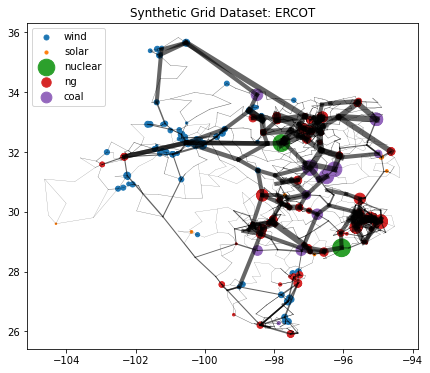

In [51]:
plt.figure(figsize=(7,6))
kinds = ['wind','solar','nuclear','ng','coal']
for k in kinds:
    sub = texas.plant[texas.plant.type==k]
    plt.scatter(sub.lon, sub.lat, s=sub.Pg/1300*300)
plt.legend(kinds)

count = 0
for b in texas.branch.index:
    if count%100==0: print(b, end=' ')
    count += 1
    branch = texas.branch.loc[b]
    plt.plot([branch.from_lon, branch.to_lon],
             [branch.from_lat, branch.to_lat], color='black', alpha=0.6, lw=branch.rateA/1000*2)
plt.title('Synthetic Grid Dataset: ERCOT')

In [94]:
# Read output file from Julia

In [103]:
lmps = pd.read_csv('D:/Papers/lmps.csv')

In [104]:
lmps[['lat','lon']] = texas.bus.reindex(lmps['x1'].astype(int))[['lat','lon']].values

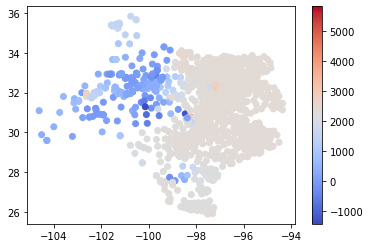

In [110]:
#https://stackoverflow.com/questions/6063876/matplotlib-colorbar-for-scatter
#https://matplotlib.org/stable/tutorials/colors/colormaps.html
cm = plt.cm.get_cmap('coolwarm')
sc = plt.scatter(lmps['lon'], lmps['lat'], c=-lmps['x2'], cmap=cm)
plt.colorbar(sc)